In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing the data
ords_prods_cust = pd.read_pickle(r'C:\Users\ahamr\Desktop\12-2023 Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers.pkl')

In [3]:
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In [4]:
ords_prods_cust.shape

(32404859, 34)

## 1. Comparing customer behavior in different geographic areas

### 1.1 Creating a regional segmentation of the data.

In [20]:
# Mapping dictionary for regions
region_mapping = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia', 'District of Columbia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
}

In [21]:
# Creating the 'Region' column based on the mapping
ords_prods_cust['region'] = ords_prods_cust['state'].map({state: region for region, states in region_mapping.items() for state in states})

In [22]:
ords_prods_cust['region']

0             Midwest
1             Midwest
2             Midwest
3             Midwest
4             Midwest
              ...    
32404854        South
32404855    Northeast
32404856    Northeast
32404857    Northeast
32404858    Northeast
Name: region, Length: 32404859, dtype: object

In [23]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   eval_set                object  
 8   order_number            int64   
 9   orders_day_of_week      int64   
 10  order_hour              int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

In [24]:
ords_prods_cust.head(40)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,prior,17,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
6,4913,Table Water Crackers,78,19,4.4,894221,138,prior,23,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
7,6184,Clementines,32,4,4.3,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
8,6901,Raisin Bran,121,14,2.9,1154289,138,prior,18,1,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,prior,2,0,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest


### 1.2 Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [25]:
# Creating a crrostab
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending flag'], dropna = False)

In [26]:
crosstab.to_clipboard()

In [27]:
print(crosstab)

spending flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


In [28]:
#Calculating the percentage of the total for each spending habit within each region
percentage_result = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

In [29]:
print(percentage_result)

spending flag  High spender  Low spender
region                                  
Midwest            2.053025    97.946975
Northeast          1.891141    98.108859
South              1.943043    98.056957
West               1.933627    98.066373


#### RESULT: There is only a minimal difference in spending habits between regions.

## 2. Excluding the customers who don't generate much revenue for the app.

### 2.1 Creating an exclusion flag for low-activity customers (customers with less than 5 orders).

In [31]:
#Grouping by "user_id" and calculate the total number of unique "order_id" for each user
user_order_count = ords_prods_cust.groupby('user_id')['order_id'].nunique()

In [33]:
print(user_order_count)

user_id
1        10
10        5
100       5
1000      7
10000    72
         ..
99995     5
99996    12
99997     3
99998     5
99999    34
Name: order_id, Length: 206209, dtype: int64


### 2.2 Creating a new dataframe excluding users with less than 5 orders.

In [35]:
#Creating a new dataframe excluding users with "user_order_count" less than 5
ords_prods_cust_excluded = ords_prods_cust[ords_prods_cust['user_id'].isin(user_order_count[user_order_count >= 5].index)]

In [36]:
# Checking the output
ords_prods_cust_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest


In [37]:
ords_prods_cust_excluded.shape

(30964518, 35)

In [38]:
# Exporting the dataframe
path = r"C:\Users\ahamr\Desktop\12-2023 Instacart Basket Analysis"
ords_prods_cust_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_users_excluded_4.10.pkl')) 

## 3. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### 3.1 Creating age_group variable.

In [39]:
# Deriving Column with loc()
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 18) & (ords_prods_cust_excluded['age'] < 28), 'age_group'] = '18_27'

C:\Users\ahamr\AppData\Local\Temp\ipykernel_17380\3768648992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 18) & (ords_prods_cust_excluded['age'] < 28), 'age_group'] = '18_27'


In [40]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 28) & (ords_prods_cust_excluded['age'] < 38), 'age_group'] = '28_37'

In [41]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 38) & (ords_prods_cust_excluded['age'] < 48), 'age_group'] = '38_47'

In [42]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 48) & (ords_prods_cust_excluded['age'] < 58), 'age_group'] = '48_57'

In [43]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['age'] >= 58) & (ords_prods_cust_excluded['age'] < 68), 'age_group'] = '58_67'

In [44]:
ords_prods_cust_excluded.loc[ords_prods_cust_excluded['age'] >= 68, 'age_group'] = '68_over'

In [46]:
# Checking the output
ords_prods_cust_excluded['age_group'].value_counts(dropna= False)

age_group
68_over    6803688
48_57      4895823
18_27      4855481
38_47      4846608
28_37      4831581
58_67      4731337
Name: count, dtype: int64

### 3.2 Creating income_group variable.

In [50]:
ords_prods_cust_excluded['income'].describe()

count    3.096452e+07
mean     9.967582e+04
std      4.314184e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [51]:
# Creating income flag using the quartiles to divide clients into the 25th percentage of lowest earners ‘Lowest_income’ and 75th percentage of highest earners ‘Highest_income’
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['income'] >67292) & (ords_prods_cust_excluded['income'] <128102), 'income_group'] = 'Avg_income'

C:\Users\ahamr\AppData\Local\Temp\ipykernel_17380\592500199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['income'] >67292) & (ords_prods_cust_excluded['income'] <128102), 'income_group'] = 'Avg_income'


In [52]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['income'] <= 67292), 'income_group'] = 'Lowest_income'

In [53]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['income'] >=128102), 'income_group'] = 'Highest_income'

In [54]:
# Checking the output
ords_prods_cust_excluded['income_group'].value_counts(dropna= False)

income_group
Avg_income        15481946
Lowest_income      7741338
Highest_income     7741234
Name: count, dtype: int64

### 3.3 Creating family_status variable.

In [59]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'married') & (ords_prods_cust_excluded['n_dependants'] == 0), 'family_status'] = 'Married_no_kids'

C:\Users\ahamr\AppData\Local\Temp\ipykernel_17380\321733681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'married') & (ords_prods_cust_excluded['n_dependants'] == 0), 'family_status'] = 'Married_no_kids'


In [63]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] =='married') & (ords_prods_cust_excluded['n_dependants'] >= 1), 'family_status'] = 'Married_kids'

In [65]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'single') &(ords_prods_cust_excluded ['n_dependants'] == 0), 'family_status'] = 'Single_no_kids'

In [67]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'single') &(ords_prods_cust_excluded ['n_dependants'] >= 1), 'family_status'] = 'Single_kids'

In [68]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'divorced/widowed') &( ords_prods_cust_excluded['n_dependants'] == 0), 'family_status'] = 'Divorced/widowed_no_kids'

In [69]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'divorced/widowed') &(ords_prods_cust_excluded ['n_dependants'] >= 1), 'family_status'] = 'Divorced/widowed_kids'

In [70]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'living with parents and siblings') &(ords_prods_cust_excluded ['n_dependants'] == 0), 'family_status'] = 'Living with family_no_kids'

In [71]:
ords_prods_cust_excluded.loc[(ords_prods_cust_excluded['fam_status'] == 'living with parents and siblings') &(ords_prods_cust_excluded ['n_dependants'] >= 1), 'family_status'] = 'Living with family_kids'

In [72]:
# Checking the output
ords_prods_cust_excluded['family_status'].value_counts(dropna= False)

family_status
Married_kids                21743700
Single_no_kids               5094375
Divorced/widowed_no_kids     2645271
Living with family_kids      1481172
Name: count, dtype: int64

In [73]:
ords_prods_cust_excluded.shape

(30964518, 38)

## 4. The distribution of profiles

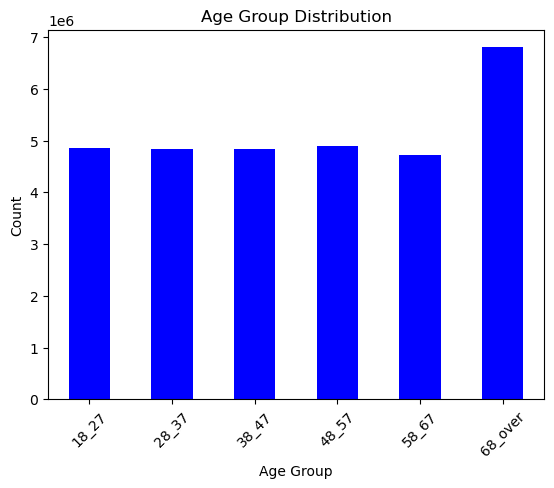

In [77]:
# Distribution of age_groups
age_group_histogram = ords_prods_cust_excluded['age_group'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_histogram.png'))
plt.show()

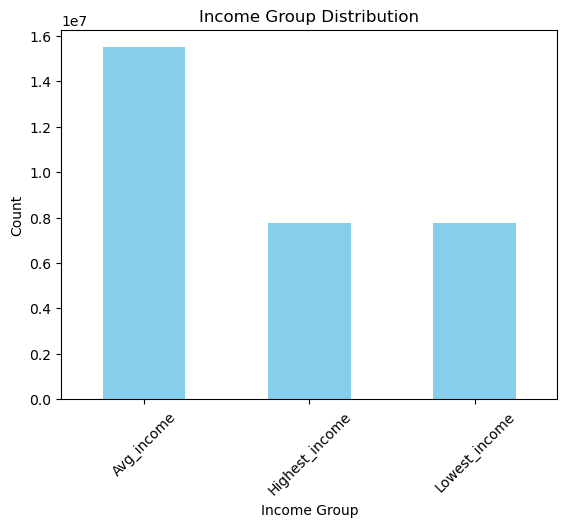

In [78]:
# Distribution of income_groups
income_group_histogram = ords_prods_cust_excluded['income_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_histogram.png'))
plt.show()

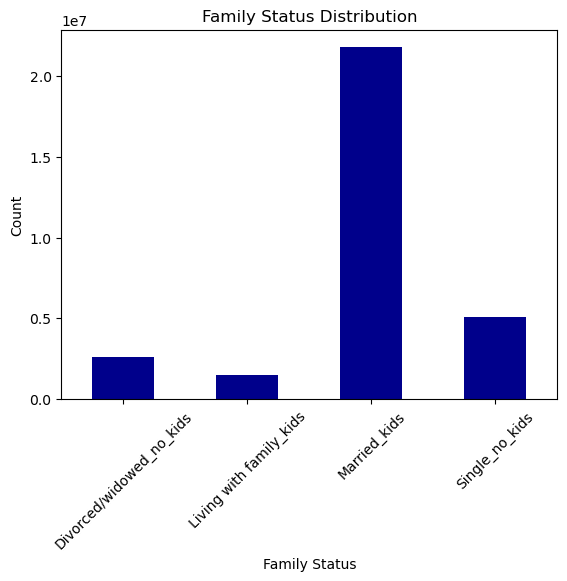

In [79]:
# Distribution of family_status
family_status_histogram = ords_prods_cust_excluded['family_status'].value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Family Status Distribution')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_histogram.png'))
plt.show()

## 5. Aggregate the max, mean, and min variables on a customer-profile level. 

### 5.1 Age Group analysis

In [84]:
df_age_group_sample = ords_prods_cust_excluded[['age', 'user_id', 'region','age_group','orders_day_of_week', 'order_hour','department_id','prices','order_id']]

In [85]:
df_age_group_sample.describe()

,age,orders_day_of_week,order_hour,department_id,prices,order_id
count,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07
mean,4.946802e+01,2.741395e+00,1.341098e+01,9.922364e+00,1.193353e+01,1.710318e+06
std,1.848528e+01,2.089254e+00,4.248846e+00,6.282440e+00,4.913448e+02,9.873788e+05
min,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
25%,3.300000e+01,1.000000e+00,1.000000e+01,4.000000e+00,4.200000e+00,8.554120e+05
50%,4.900000e+01,3.000000e+00,1.300000e+01,9.000000e+00,7.400000e+00,1.710405e+06
75%,6.500000e+01,5.000000e+00,1.600000e+01,1.600000e+01,1.130000e+01,2.565207e+06
max,8.100000e+01,6.000000e+00,2.300000e+01,2.100000e+01,9.999900e+04,3.421083e+06


In [86]:
df_age_group_sample.head()

,age,user_id,region,age_group,orders_day_of_week,order_hour,department_id,prices,order_id
0,81,138,Midwest,68_over,6,11,19,5.8,3139998
1,81,138,Midwest,68_over,6,17,19,5.8,1977647
2,81,138,Midwest,68_over,5,13,12,20.0,3160996
3,81,138,Midwest,68_over,5,14,12,20.0,2254091
4,81,138,Midwest,68_over,6,12,10,12.9,505689


In [87]:
df_age_group_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964518 entries, 0 to 32404847
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   age                 int64  
 1   user_id             object 
 2   region              object 
 3   age_group           object 
 4   orders_day_of_week  int64  
 5   order_hour          int64  
 6   department_id       int64  
 7   prices              float64
 8   order_id            int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.3+ GB


### 5.2 Income group analysis

In [88]:
df_income_group_sample = ords_prods_cust_excluded[['income', 'income_group', 'user_id', 'region','orders_day_of_week', 'order_hour','department_id','prices','order_id']]

In [89]:
df_income_group_sample.head()

,income,income_group,user_id,region,orders_day_of_week,order_hour,department_id,prices,order_id
0,49620,Lowest_income,138,Midwest,6,11,19,5.8,3139998
1,49620,Lowest_income,138,Midwest,6,17,19,5.8,1977647
2,49620,Lowest_income,138,Midwest,5,13,12,20.0,3160996
3,49620,Lowest_income,138,Midwest,5,14,12,20.0,2254091
4,49620,Lowest_income,138,Midwest,6,12,10,12.9,505689


In [90]:
df_income_group_sample.describe()

,income,orders_day_of_week,order_hour,department_id,prices,order_id
count,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07
mean,9.967582e+04,2.741395e+00,1.341098e+01,9.922364e+00,1.193353e+01,1.710318e+06
std,4.314184e+04,2.089254e+00,4.248846e+00,6.282440e+00,4.913448e+02,9.873788e+05
min,2.590300e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
25%,6.729200e+04,1.000000e+00,1.000000e+01,4.000000e+00,4.200000e+00,8.554120e+05
50%,9.676500e+04,3.000000e+00,1.300000e+01,9.000000e+00,7.400000e+00,1.710405e+06
75%,1.281020e+05,5.000000e+00,1.600000e+01,1.600000e+01,1.130000e+01,2.565207e+06
max,5.939010e+05,6.000000e+00,2.300000e+01,2.100000e+01,9.999900e+04,3.421083e+06


### 5.3 Family status analysis

In [92]:
df_family_status_sample = ords_prods_cust_excluded[['family_status','fam_status', 'n_dependants', 'user_id', 'region','orders_day_of_week', 'order_hour','department_id','prices','order_id']]

In [93]:
df_family_status_sample.head()

,family_status,fam_status,n_dependants,user_id,region,orders_day_of_week,order_hour,department_id,prices,order_id
0,Married_kids,married,1,138,Midwest,6,11,19,5.8,3139998
1,Married_kids,married,1,138,Midwest,6,17,19,5.8,1977647
2,Married_kids,married,1,138,Midwest,5,13,12,20.0,3160996
3,Married_kids,married,1,138,Midwest,5,14,12,20.0,2254091
4,Married_kids,married,1,138,Midwest,6,12,10,12.9,505689


In [94]:
df_family_status_sample.describe()

,n_dependants,orders_day_of_week,order_hour,department_id,prices,order_id
count,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07,3.096452e+07
mean,1.501821e+00,2.741395e+00,1.341098e+01,9.922364e+00,1.193353e+01,1.710318e+06
std,1.118896e+00,2.089254e+00,4.248846e+00,6.282440e+00,4.913448e+02,9.873788e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,4.200000e+00,8.554120e+05
50%,2.000000e+00,3.000000e+00,1.300000e+01,9.000000e+00,7.400000e+00,1.710405e+06
75%,3.000000e+00,5.000000e+00,1.600000e+01,1.600000e+01,1.130000e+01,2.565207e+06
max,3.000000e+00,6.000000e+00,2.300000e+01,2.100000e+01,9.999900e+04,3.421083e+06


## 6. Department Analysis

In [95]:
ords_prods_cust_excluded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964518 entries, 0 to 32404847
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   eval_set                object  
 8   order_number            int64   
 9   orders_day_of_week      int64   
 10  order_hour              int64   
 11  days_since_prior_order  float64 
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spending fl

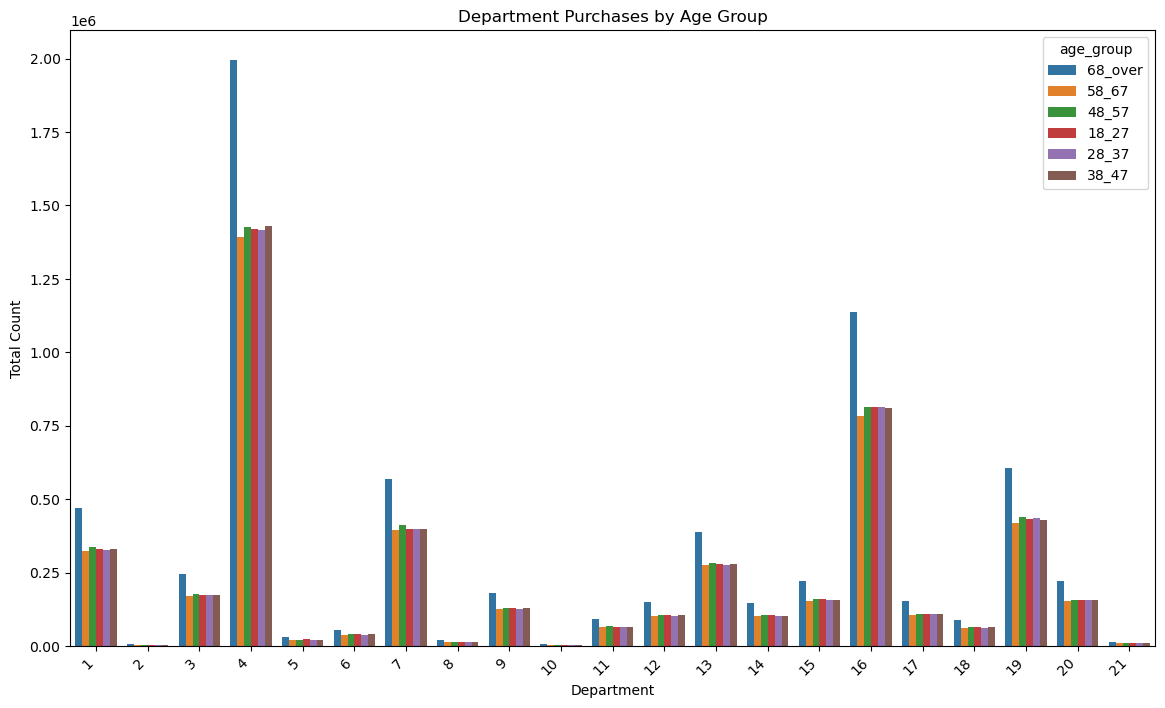

In [97]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='department_id', hue='age_group', data=ords_prods_cust_excluded)

# Add labels and title
plt.title('Department Purchases by Age Group')
plt.xlabel('Department')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age_bar.png'))

# Show the plot
plt.show()

## Adding the column - departments for better visual

In [98]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [99]:
df_dep_t = df_dep.T

In [100]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [101]:
new_header = df_dep_t.iloc[0]

In [102]:
df_dep_t_new = df_dep_t[1:]

In [103]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [104]:
# Define the mapping of department_id to department names
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Create a new column "department" based on the mapping
ords_prods_cust_excluded['department'] = ords_prods_cust_excluded['department_id'].map(department_mapping)

C:\Users\ahamr\AppData\Local\Temp\ipykernel_17380\1311797740.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_excluded['department'] = ords_prods_cust_excluded['department_id'].map(department_mapping)


In [106]:
ords_prods_cust_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,date_joined,n_dependants,fam_status,income,_merge,region,age_group,income_group,family_status,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,8/1/2019,1,married,49620,both,Midwest,68_over,Lowest_income,Married_kids,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,8/1/2019,1,married,49620,both,Midwest,68_over,Lowest_income,Married_kids,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,8/1/2019,1,married,49620,both,Midwest,68_over,Lowest_income,Married_kids,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,8/1/2019,1,married,49620,both,Midwest,68_over,Lowest_income,Married_kids,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,8/1/2019,1,married,49620,both,Midwest,68_over,Lowest_income,Married_kids,bulk


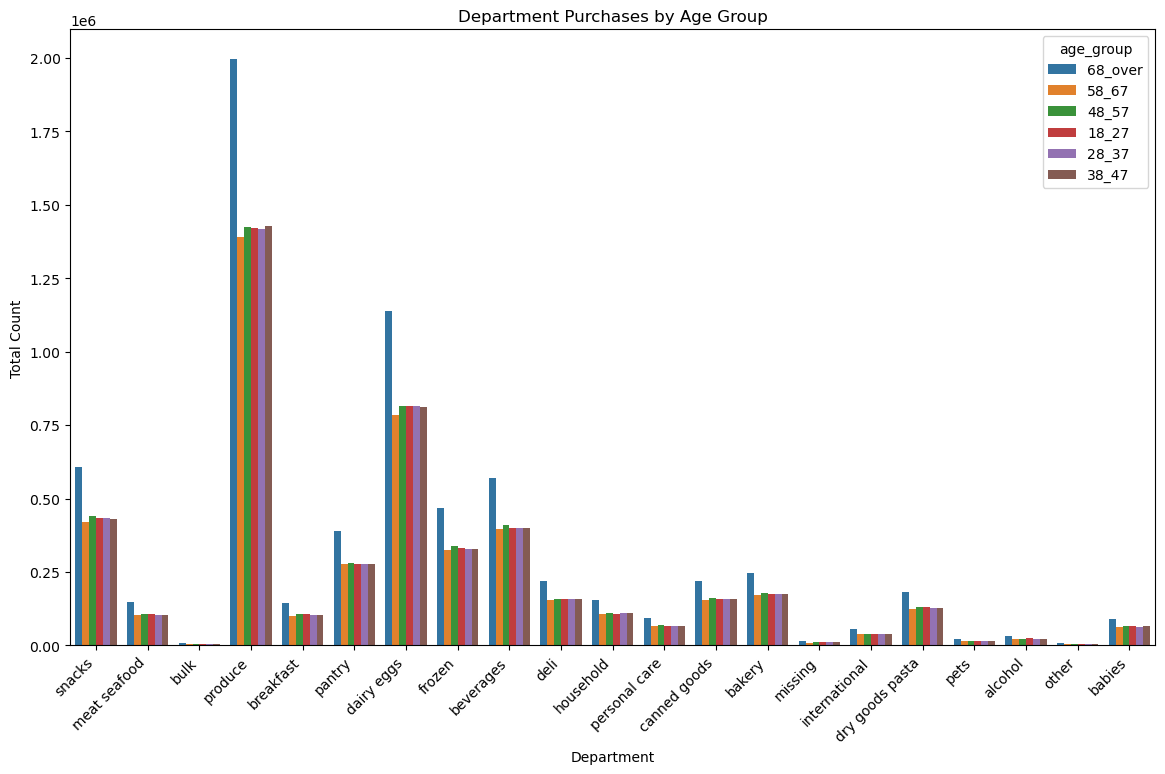

In [108]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='department', hue='age_group', data=ords_prods_cust_excluded)

# Add labels and title
plt.title('Department Purchases by Age Group')
plt.xlabel('Department')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age_bar.png'))

# Show the plot
plt.show()

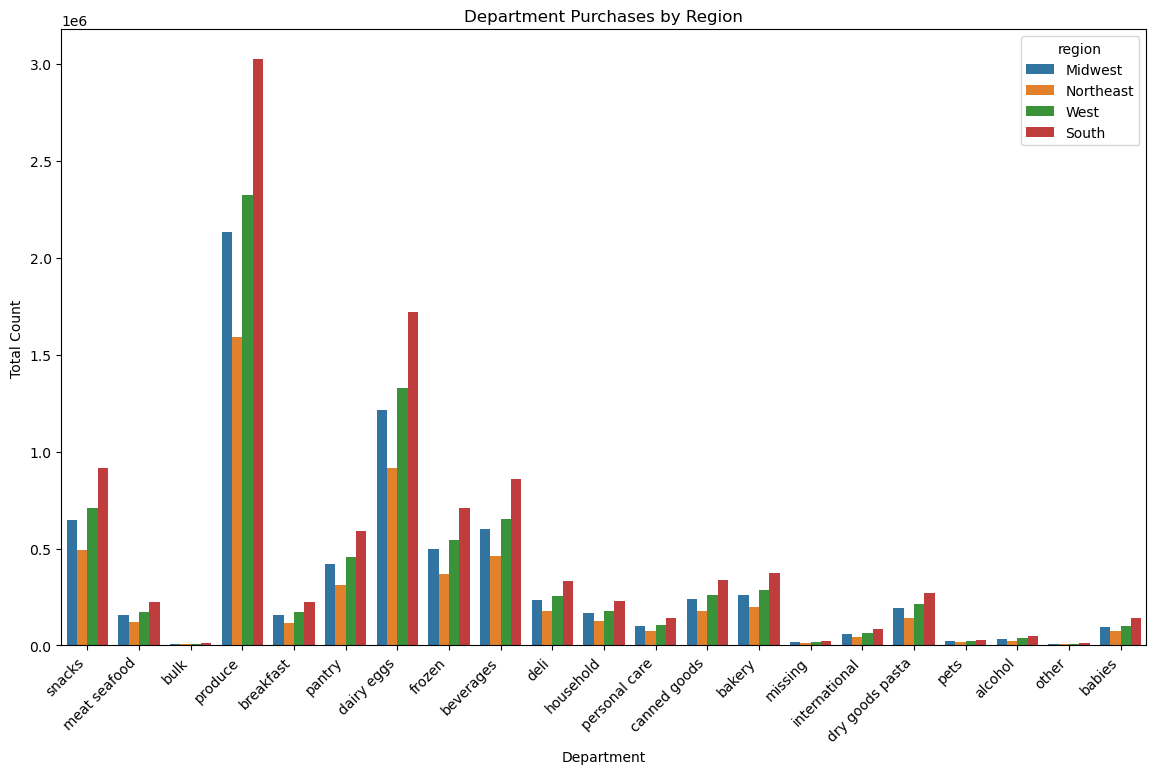

In [109]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='department', hue='region', data=ords_prods_cust_excluded)

# Add labels and title
plt.title('Department Purchases by Region')
plt.xlabel('Department')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_orders_count_by_region_bar.png'))

# Show the plot
plt.show()

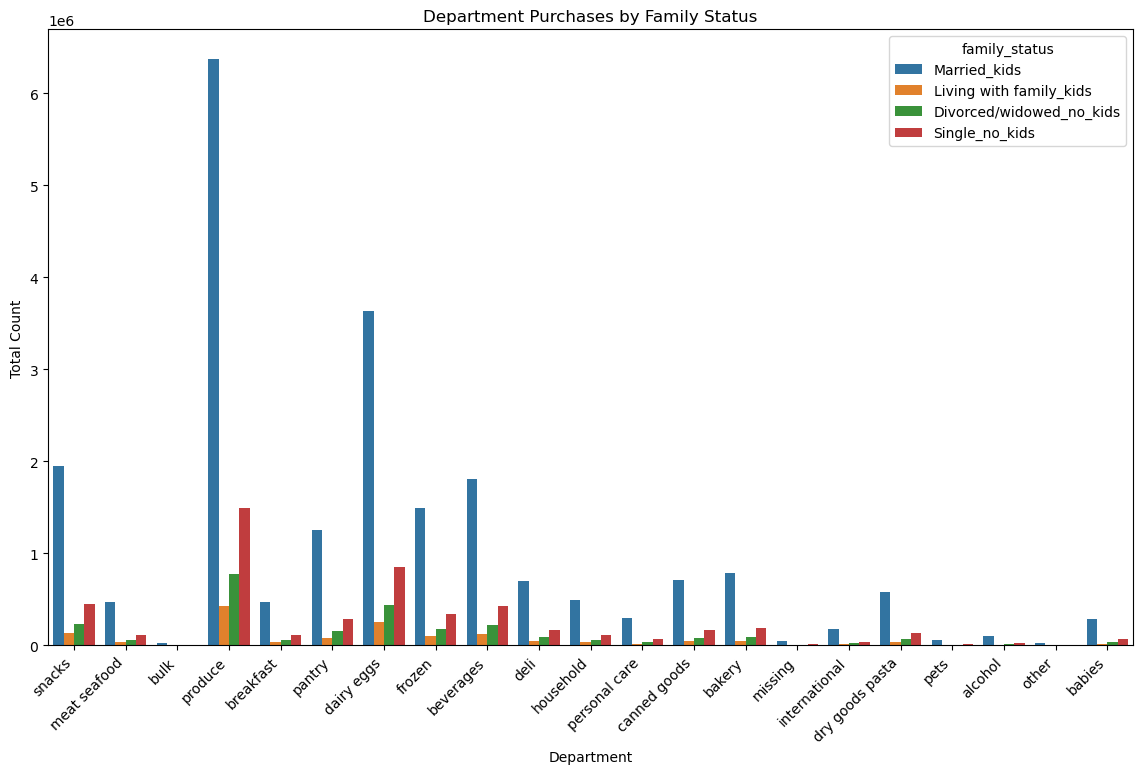

In [110]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='department', hue='family_status', data=ords_prods_cust_excluded)

# Add labels and title
plt.title('Department Purchases by Family Status')
plt.xlabel('Department')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_orders_count_by_fam_status_bar.png'))

# Show the plot
plt.show()

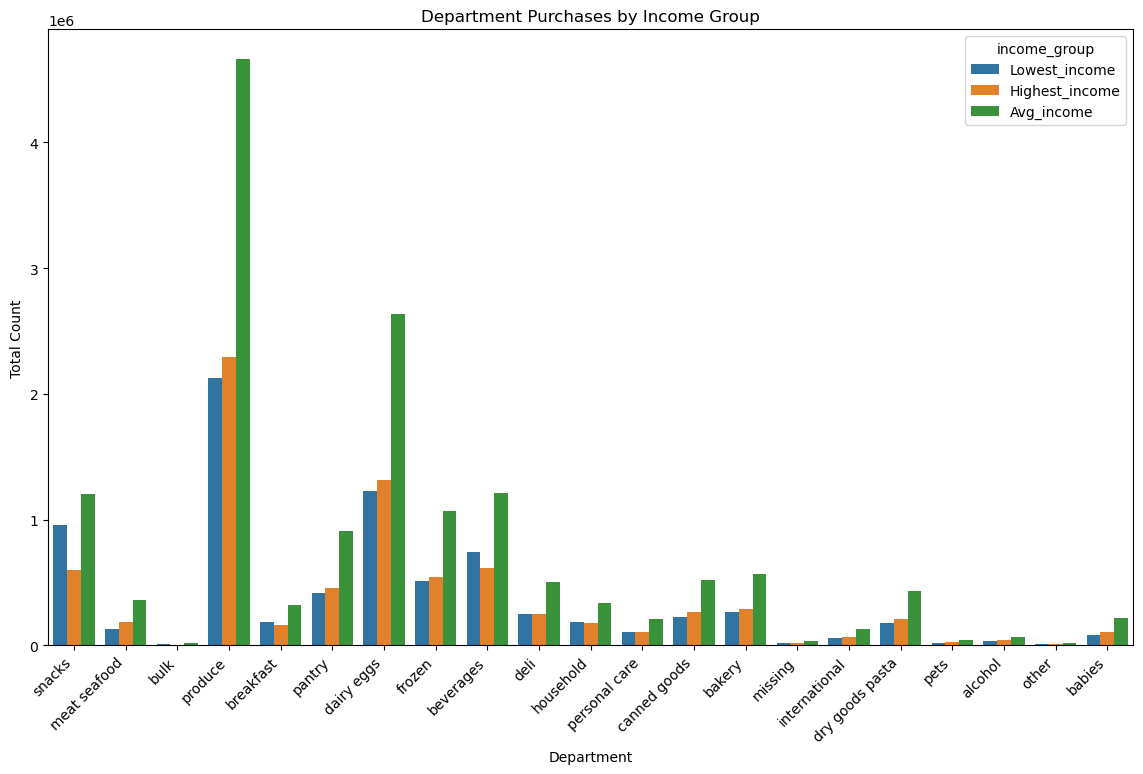

In [111]:
# Create a count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='department', hue='income_group', data=ords_prods_cust_excluded)

# Add labels and title
plt.title('Department Purchases by Income Group')
plt.xlabel('Department')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_orders_count_by_income_bar.png'))

# Show the plot
plt.show()

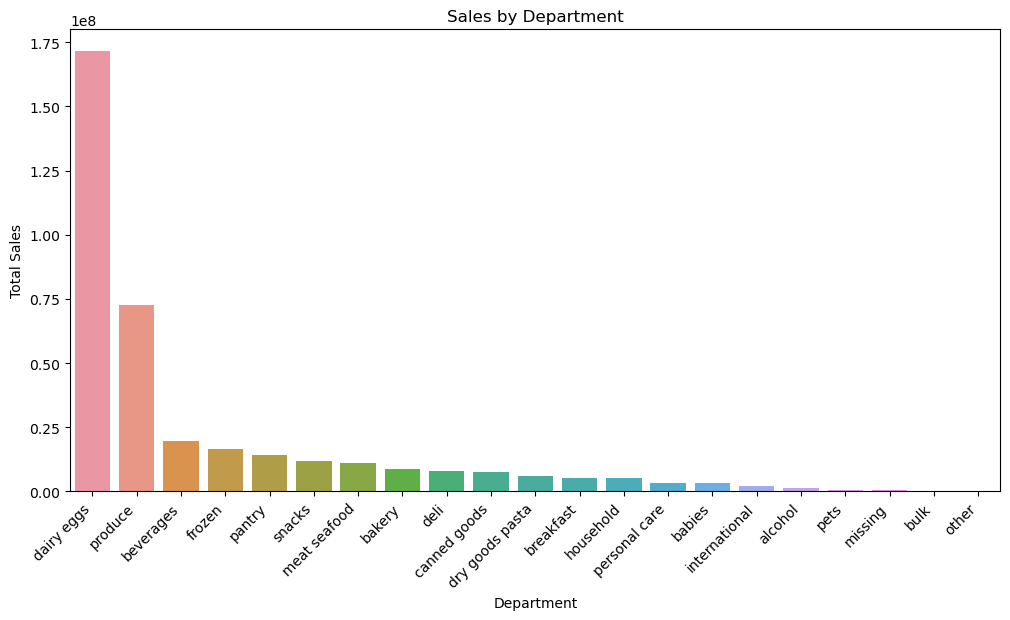

In [112]:
# Group by department and calculate the sum of prices for each department
department_sales = ords_prods_cust_excluded.groupby('department')['prices'].sum().sort_values(ascending=False)

# Create a bar chart to show department sales
plt.figure(figsize=(12, 6))
sns.barplot(x=department_sales.index, y=department_sales.values)
plt.title('Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 7. Region Analysis

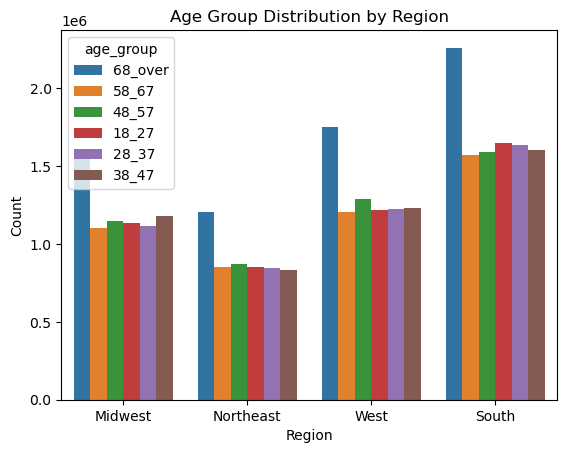

In [115]:
sns.countplot(data=df_age_group_sample, x='region', hue='age_group')

plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region.png'))
plt.show()

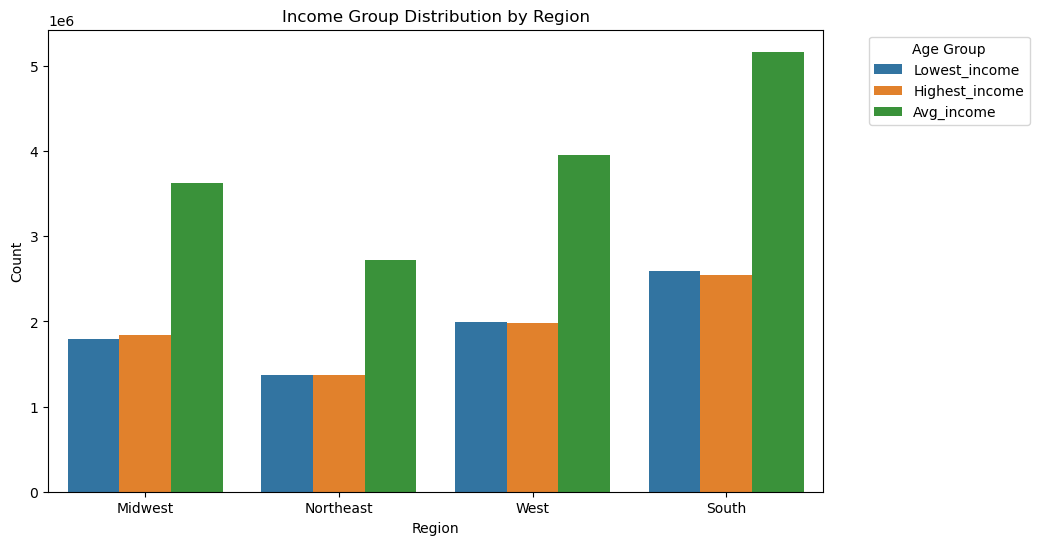

In [116]:
#regions by income
plt.figure(figsize=(10, 6))
sns.countplot(data=df_income_group_sample, x='region', hue='income_group')

plt.title('Income Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region.png'))
plt.show()

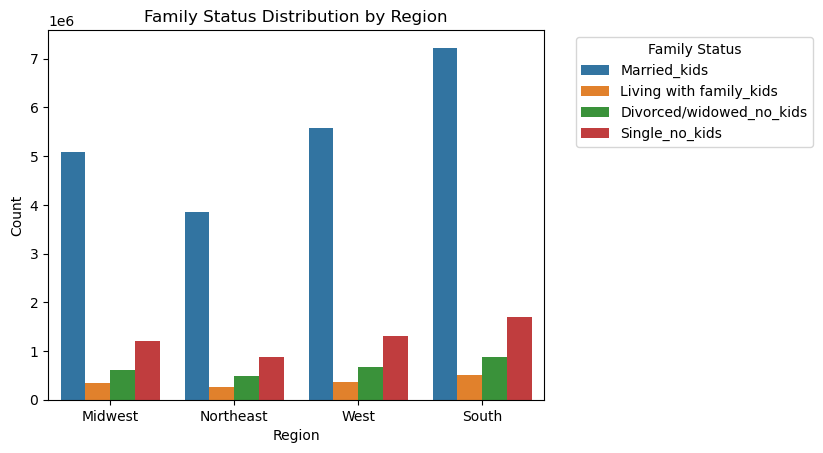

In [119]:
#regions by family status
sns.countplot(data=df_family_status_sample, x='region', hue='family_status')

plt.title('Family Status Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_region.png'))
plt.show()

In [120]:
# Exporting the data
ords_prods_cust_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_excluded_final.pkl')) 

## Visualizations for Report

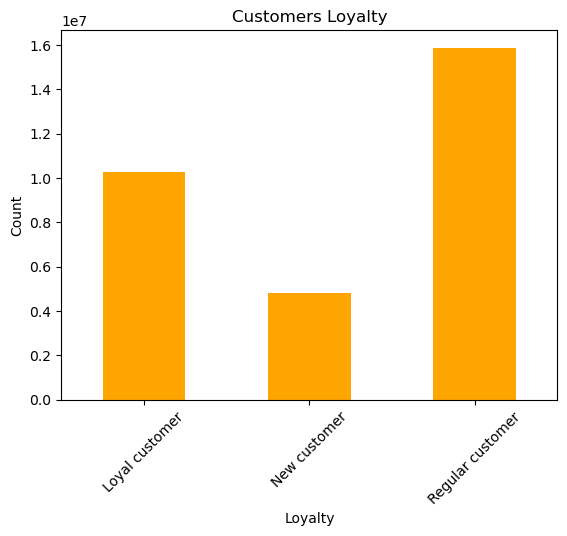

In [4]:
# Distribution of loyalty customers
income_group_histogram = df['loyalty_flag'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Customers Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.xticks(rotation=45)
path = r"C:\Users\ahamr\Desktop\12-2023 Instacart Basket Analysis"
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_histogram.png'))
plt.show()

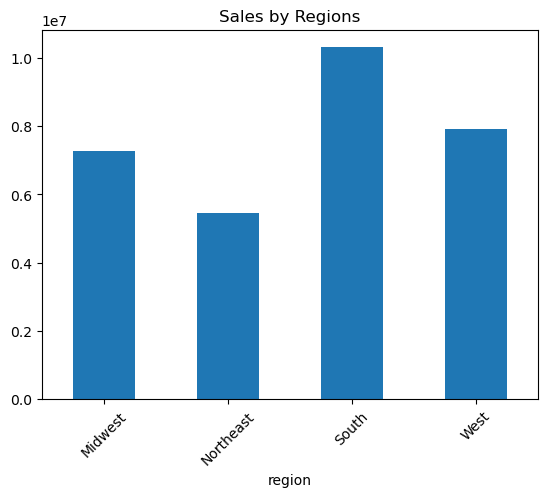

In [5]:
# Distribution of regions
income_group_histogram = df['region'].value_counts().sort_index().plot(kind='bar')
plt.title('Sales by Regions')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_histogram.png'))
plt.show()

Text(0.5, 1.0, 'Age vs Family Status')

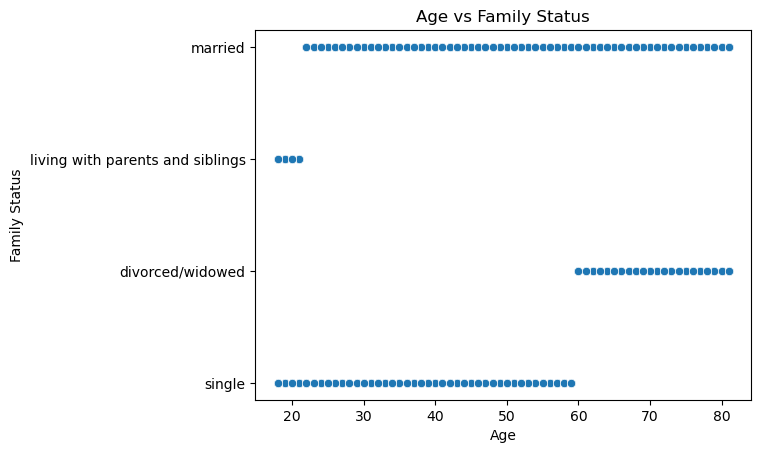

In [7]:
# Creating a Scatterplot
scatterplot_age_fam_status = sns.scatterplot(x = 'age', y = 'fam_status',data = df)
scatterplot_age_fam_status.set(xlabel='Age', ylabel='Family Status')
plt.title('Age vs Family Status')